Business Understanding(DATA GATHERING):
I am trying to compare and analyse the trends in waste generation and management practices throughout the world. In particular, I would like to focus on following three areas of exploration:
1. effect of imposing penalty on waste collection, 
2. monetary and non-monetary limitations of exisiting waste management practices, and 
3. After studying the effect of penalty fees on waste management and identifying areas for innovation, finally determine a potential service/product market space in wast management.

Innovation needs to be directed towards overcoming these limitations and adding value to the consumer. I think we can find parties (consumers or institutions or governments) willing to pay sufficient penalty fees in exchange for efficient waste management and other returns.


Data Understanding (DATA ASSESMENT):
The dataset has been downloaded beforehand to overview the themes of information. After checking the description of dataset, I realise major themes of information and empty columns. ALso, there is a need to clean the data and make it uniform


In [42]:
import os, types
import numpy as np
import pandas as pd
def __iter__(self): return 0
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import ImputingValues as t
%matplotlib inline
data_path = 'C:/Users/ruchi/OneDrive/projects/data/worldBank_waste/city_level_data_0_0.csv'
df_city = pd.read_csv(data_path )
df_city.describe(include='all')
#df_city = df_city.dropna(thresh=3, axis=1)
columns_name_indices = ['iso3c', 'region_id', 'country_name', 'income_id', 'city_name', 'total_msw_total_msw_generated_tons_year', 'population_population_number_of_people']
predict_columns_name_indices = ['iso3c', 'region_id', 'country_name', 'income_id', 'city_name', 'population_population_number_of_people']
#choose only those cities whose msw generation is reported
df_city = df_city[df_city['total_msw_total_msw_generated_tons_year'].notna()]
df_city['total_msw_total_msw_generated_tons_year'] = pd.to_numeric(df_city['total_msw_total_msw_generated_tons_year'], errors='coerce')
df_city = df_city.set_index(columns_name_indices)
df_city.describe(include='all')

,additional_data_annual_budget_for_waste_management_year,additional_data_annual_solid_waste_budget_year,additional_data_annual_swm_budget_2017_year,additional_data_annual_swm_budget_year,additional_data_annual_waste_budget_year,additional_data_collection_ton,additional_data_number_of_scavengers_on_dumpsites_number,additional_data_other_user_fees_na,additional_data_swm_contract_arrangement_1_year_contract_period,additional_data_swm_contract_arrangement_3_year_contract_period,...,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent
count,1,1,0.0,2.000000e+00,1.0,1.00,1.0,1,1,0,...,66.000000,55.000000,29.000000,16.000000,97.000000,47.000000,124.000000,55.000000,114.000000,4.000000
unique,1,1,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"700,000 - 800,000","Php837,801,975",NaN,NaN,NaN,NaN,NaN,Plastic shopping bag,Service contract,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.599229e+06,4035882.0,0.73,200.0,NaN,NaN,NaN,...,19.494394,46.595455,42.091724,57.646875,65.941443,21.894404,15.623145,67.172182,30.714439,20.775000
std,NaN,NaN,NaN,3.506159e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,20.328887,31.265287,29.848297,35.336363,33.406604,21.620369,15.674725,30.722950,29.484419,14.125715
min,NaN,NaN,NaN,1.200000e+05,4035882.0,0.73,200.0,NaN,NaN,NaN,...,0.000000,1.000000,0.230000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,NaN,NaN,NaN,1.359614e+06,4035882.0,0.73,200.0,NaN,NaN,NaN,...,2.742500,20.000000,10.000000,23.750000,41.500000,5.500000,4.670000,45.850000,5.000000,11.000000
50%,NaN,NaN,NaN,2.599229e+06,4035882.0,0.73,200.0,NaN,NaN,NaN,...,14.100000,48.800000,41.020000,70.050000,74.000000,14.420000,10.000000,81.100000,23.400000,21.550000
75%,NaN,NaN,NaN,3.838844e+06,4035882.0,0.73,200.0,NaN,NaN,NaN,...,28.750000,67.350000,71.100000,87.707500,100.000000,36.365000,21.000000,91.000000,50.555000,31.325000


In [43]:
    
#print(input_df.head)#['population_population_number_of_people'].value_counts(bins = 4))#.plot.bar()#
    
#grouped = input_df.groupby(levels)#.value_counts#filter(like='composition').plot.bar(stacked=True, rot=75).legend(bbox_to_anchor=(1.04,1), loc="upper left") 
#grouped_occurences = grouped.size().to_frame('occurences')#.reset_index()
#grouped_occurences.unstack().plot(kind='bar', stacked=True)#.plot.bar(stacked=True)
#print(grouped_occurences)
#plt.xticks(rotation=90)
#plt.show()
    
#for name, group in grouped:        
#print("NAME",name)
#print(group)#grouped.get_group(name).index.get_level_values(levels[2]).value_counts(bins = 4).plot.bar()#axs[row])
#plt.show()
#plt.xticks(rotation=90)
#plt.show()

grouped = df_city.groupby('income_id')#.value_counts#filter(like='composition').plot.bar(stacked=True, rot=75).legend(bbox_to_anchor=(1.04,1), loc="upper left") 
for name, group in grouped:
    print(name)

HIC
LIC
LMC
UMC


Data Preparation (DATA CLEANING)

I have identified major themes of information that I want to study to get my answers.
I will filter main dataset and generate smaller data sets to study the individual themes.
I have also decided to drop rows of the filtered datasets if all the values are absent. Instead of dropping rows of the original dataset, I can assess which themes of information are consistently underreported or compulsorily maintained by the  governing bodies.

In [44]:
#
#To make it easier to track the various themes of information,
#group column data by the information it provides and name the groups 


informal_impact_df = df_city.filter(like='informal').dropna(axis=0,how='all')
informal_impact_df.name = 'informal_impact_df'
composition_df = df_city.filter(like='composition').dropna(axis=0,how='all')
composition_df.name = 'composition_df'
separation_df = df_city.filter(like='separation').dropna(axis=0,how='all')
separation_df.name = 'separation_df'
transportation_df = df_city.filter(like='transportation').dropna(axis=0,how='all')
transportation_df.name = 'transportation_df'
collection_cost_df = df_city.filter(like='collection_cost').dropna(axis=0,how='all')
collection_cost_df.name = 'collection_cost_df'
collection_cover_df = df_city.filter(like='collection_cover').dropna(axis=0,how='all')
collection_cover_df.name = 'collection_cover_df'
management_df = df_city.filter(like='management_cost').dropna(axis=0,how='all')
management_df.name = 'management_df'
disposal_df = df_city.filter(like='disposal').dropna(axis=0,how='all')
disposal_df.name = 'disposal_df'
treatment_df = df_city.filter(like='treatment').dropna(axis=0,how='all')
treatment_df.name = 'treatment_df'
energy_df = df_city.filter(like='energy').dropna(axis=0,how='all')
energy_df.name = 'energy_df'
framework_df = df_city.filter(like='framework').dropna(axis=0,how='all')
framework_df.name = 'framework_df'


Data Preparation (DATA CLEANING)

The dataset has been collected by various governing bodies throughout the world. Hence, the entries are not uniform.
1. Need to make the percentage and absolute values uniform
2. Need to make lower and upper case entries, with varying punctuation marks uniform
3. I choose to impute missing values by using mean of groups chosen by the user (here, I use mean of income level group and geography group)


In [64]:
#Functions for cleaning the data


def rectify_data(input_df):
    '''Make string entries and categorical data of uniform case and punctuation, 
    convert strings to numbers where necessary
    input: input_df = dataframe
    output: cleaned dataframe
    '''
    if len(input_df.select_dtypes(exclude=['object']).columns.tolist()):
        #print("Cleaning numerical data")
        if input_df.name == 'informal_impact_df':
            for index in input_df['informal_sector_total_waste_pickers_number'].where(input_df['informal_sector_total_waste_pickers_number']>0):
                print(input_df['informal_sector_child_waste_pickers_number'])
                input_df.iloc[index]['informal_sector_child_waste_pickers_percent'] = 100*(input_df.iloc[index]['informal_sector_child_waste_pickers_number']/input_df.iloc[index]['informal_sector_total_waste_pickers_number'])
                input_df.iloc[index]['informal_sector_female_waste_pickers_percent'] = 100*(input_df.iloc[index]['informal_sector_female_waste_pickers_number']/input_df.iloc[index]['informal_sector_total_waste_pickers_number'])
                input_df = input_df.drop(columns=['informal_sector_child_waste_pickers_number', 'informal_sector_female_waste_pickers_number'])    

    for column in input_df.select_dtypes(include=['object']).columns.tolist():
        #print("Cleaning categorical data", column)
        if input_df[column].str.isnumeric().any():
            #print("Column has numbers in string")
            input_df[column] = pd.to_numeric(input_df[column], errors='coerce')
        else:
            #print("Column has string data")
            value_list = ['yes', 'no ', 'door', 'curbside', 'centralized-drop-off', 'mulitple', 'other', 'flat fee per bussiness']
            for value in value_list:
                input_df.loc[input_df[column].str.contains(value, na=False, case=False), column] = value
    #print("Data rectified")
    return input_df

def fill_num_data(input_df, levels, num_cols):
    '''Impute missing values in a group by the mean of that group. 
    Cities can be grouped by income levels and geography.
    input: input_df = dataframe, 
           levels = list of columns by which the dataframe can be grouped to calculate missing values, 
           num_cols = numerical columns
    output: imputed dataframe
    '''
    for column in num_cols:
        #print("Fill missing numerical data column ",column, "with mean of ", levels[0])
        input_df[column] = input_df[column].fillna(input_df.groupby(levels[0])[column].transform('mean'))
        if input_df[column].isnull().any():
            #print("Fill missing numerical data column ",column, "with mean of ", levels[1])
            input_df[column] = input_df[column].fillna(input_df.groupby(levels[1])[column].transform('mean'))
        if input_df[column].isnull().any():
            #print("Fill missing numerical data column ",column, "with mean of country_name")
            input_df[column] = input_df[column].fillna(input_df.groupby('country_name')[column].transform('mean'))
        if input_df[column].isnull().any():
            #print("cannot fill missing numerical data. Drop row")
            input_df = input_df[input_df[column].notnull()]
    return input_df

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    function to create a dataframe with dummy columns for each categorical entry 
    with numerical column values indicating presence or absence of categorical information  
    input:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    output:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
            
    return df
    



Evaluation (DATA ANALYSIS AND VISUALIZATION)

1. Use visualisation of data to study how each information theme, income level, geography, and population affects solid waste generation.
2. Evaluate priorities of governing bodies by studying reported and non reported data


In [65]:
#Functions for visualising data

def get_reportedData_distribution(input_df):
    ''' Get distribution of cities reporting and not reporting a certain data to know the priorities in governance.
    input: input_df = dataframe
    output: NA
    '''
    reported_count = {column:input_df[column].dropna(how='all').shape[0] for column in  input_df.columns}
    plt.bar(range(len(reported_count)), list(reported_count.values()), tick_label=list(reported_count.keys()))
    lgd = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xticks(rotation=90)
    plt.ylabel('country_count')
    plt.savefig(input_df.name+'reportedData_vs_countryCount.png', format='png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.title(input_df.name+'reportedData_vs_countryCount')
    plt.show()
    print("*********END OF REPORTED DATA***********")
    
    
def get_stacked_distribution(input_df, levels,cluster_levels):
    '''Get bar plots of number of countries reporting certain data, mean population, and mean municipal solid waste collected 
    where countries are grouped by income levels and region ids
    input: input_df = dataframe
           levels = list of columns to group the dataframe by. 
                    CUrrently using the income id and geographical id of countries
           cluster_levels = list of columns with numerical data for calculating mean of the above groups. 
                           Currently using the municipal solid waste in tonnes and population
    '''

    input_df2 = input_df.reset_index().groupby(levels).agg(    
    count_country =('country_name', "count"),# Get count of country for each group
    mean_population =(cluster_levels[1], 'mean'),# Get mean of the population for each group
    mean_msw =(cluster_levels[0], 'mean')# Get mean of the msw for each group
    )    
    
    #ig, axes = plt.subplots(nrows=1, ncols=3)
    print('mean population')
    
    input_df2['mean_population'].unstack().plot(kind='bar', stacked=False)#,ax=axes[0,0])#
    lgd = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xticks(rotation=90)
    plt.ylabel('mean population')
    plt.savefig(input_df.name+'_'+levels[0]+'_'+levels[1]+'_vs_meanPopulation.png', format='png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.title(input_df.name+'_'+levels[0]+'_'+levels[1]+'_vs_meanPopulation')
    plt.show()
    print('mean msw')
    input_df2['mean_msw'].unstack().plot(kind='bar', stacked=False)#,ax=axes[0,1])#
    lgd = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xticks(rotation=90)
    plt.ylabel('mean msw')
    plt.savefig(input_df.name+'_'+levels[0]+'_'+levels[1]+'_vs_meanMSW.png', format='png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.title(input_df.name+'_'+levels[0]+'_'+levels[1]+'_vs_meanMSW')
    plt.show()
    #print('count_country', input_df2['count_country'].unstack())
    input_df2['count_country'].unstack().plot(kind='bar', stacked=True)#,ax=axes[0,2]
    lgd = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.ylabel('country_count')
    plt.xticks(rotation=90)
    plt.savefig(input_df.name+'_'+levels[0]+'_'+levels[1]+'_vs_countryCount.png', format='png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.title(input_df.name+'_'+levels[0]+'_'+levels[1]+'_vs_countryCount')
    plt.show()
    num_cols = input_df.select_dtypes(exclude=['object']).columns.tolist()
    if num_cols:
        #print("numerical data present. Plot mean and then get clusters")        
        for level in levels:
            input_df3 = input_df.groupby(level).agg(['mean'])
            #print(input_df3)
            input_df3.plot(kind='bar', stacked=False)#
            lgd = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
            plt.xticks(rotation=90)
            plt.ylabel('all_numerical_columns_mean')
            plt.savefig(input_df.name+'_'+level+'_'+'_all_numerical_columns_mean.png', format='png', bbox_extra_artists=(lgd,), bbox_inches='tight')
            plt.title(input_df.name+'_'+level+'_'+'_all_numerical_columns_mean')
            plt.show()
            
    #else:
     #   print("For categorical data. Cannot get mean. Get clusters of ")
        
    #for column in input_df.select_dtypes(exclude=['object']).columns.tolist():#input_df.columns:
        #print(column)
        #input_df3[column].unstack().plot(kind='bar', stacked=False)#
        #plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        #plt.xticks(rotation=90)
        #plt.show()
    
    
    #input_df.plot.line(rot=90)
    #print("*********END OF STACKED DISTRIBUTION***********")    
    

def plot_grouped_df(grouped_df, ax,  x, y, cmap = plt.cm.coolwarm):
    '''Get bar plots of reported data values by countries grouped by income levels and region ids'''
    colors = cmap(np.linspace(0.5, 1, len(grouped_df)))
    c=np.array([colors])
    for i, (name,group) in enumerate(grouped_df):
        group.plot(ax=ax,
                   kind='scatter', 
                   x=x, y=y,
                   color=colors[i],
                   label = name)
def get_clusters(input_df, levels,cluster_level):
    
    plt_col = 1
    num_cols = input_df.select_dtypes(exclude=['object']).columns.tolist()
    plt_row_num = len(num_cols)#len(levels)* 
    cat_cols = input_df.select_dtypes(include=['object']).columns.tolist()
    plt_row_cat = len(cat_cols)
    
    count = 1
    for column in num_cols:       
        for level in levels:
            #print("Numerical Data: ",column, level)
            fig, ax = plt.subplots(figsize=(10,2))        
            plot_grouped_df(input_df.reset_index().groupby(level),ax, x=column, y=cluster_level)
            #plt.subplot(plt_row,1,count)
            lgd = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
            count = count +1
            plt.savefig(input_df.name+'_'+level+'_'+column+'.png', format='png', bbox_extra_artists=(lgd,), bbox_inches='tight')   
            plt.title(input_df.name+'_'+level+'_'+column)
            plt.show()
             
    count = 1
    for column in cat_cols:        
        for level in levels:
            #print("Categorical Data:", column, level, cluster_level)
            sns.catplot(x=level, y=cluster_level, hue=column, kind="boxen", data=input_df.reset_index())
            #input_df.reset_index().groupby(level)[column].plot.bar()
            lgd = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
            count = count +1
            plt.savefig(input_df.name+'_'+level+'_'+column+'.png', format='png', bbox_extra_artists=(lgd,), bbox_inches='tight')
            plt.title(input_df.name+'_'+level+'_'+column)
            plt.show()
    #print("*********END OF CLUSTERS***********")    


    return 1
            

In [66]:
def check_relation(df):

    #Only use quant variables and drop any rows with missing values    
    num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
    plt_row_num = len(num_cols)#len(levels)* 
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    plt_row_cat = len(cat_cols)
    input_dummy_df = df
    #print(input_dummy_df)
    if plt_row_num:
        input_dummy_df = fill_num_data(df, levels, num_cols)
    if plt_row_cat:
        input_dummy_df = create_dummy_df(input_dummy_df, cat_cols, dummy_na=True)
    

    input_df = input_dummy_df.reset_index()#   
    input_df = input_df[input_df['total_msw_total_msw_generated_tons_year'].notna()]
    input_df = input_df.set_index(predict_columns_name_indices)

    #Split into explanatory and response variables
    y = input_df['total_msw_total_msw_generated_tons_year']
    X = input_df.drop(['total_msw_total_msw_generated_tons_year'], axis=1)
    
    print("Check if x or y is nan or inf")
    print(np.any(np.isinf(X)))
    print(np.any(np.isinf(y)))
    print(np.any(np.isnan(X)))
    print(np.any(np.isnan(y)))
    print(X.columns[X.isnull().any()].tolist(), X.isnull().sum().sum())
    print(y.isnull().any(), y.isnull().sum().sum())
    #print(X[X.columns[X.isnull().any()].tolist()])
    print(pd.isnull(y).any().nonzero()[0])#np.where(y.isna())#y[y.isnull().any()])
    #print("CHeck for categorical data", input_dummy_df.select_dtypes(include=['object']).columns.tolist())
    #Split into train and test
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .50, random_state=42) 
    print(X_train.size, X_test.size)
    lm_model = LinearRegression(normalize=False) # Instantiate
    lm_model.fit(X_train, y_train) #Fit
        
    #Predict and score the model
    y_test_preds = lm_model.predict(X_test) 
    print("The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))

Deployment

1. To study effect of penalty on waste generation and management, I have chosen to study statistics relating to composition, separation, and collection of waste
2. To study non monetary impact of waste management, I have chosen to study statistics relating to transportation, treatment, and informal impact
3. To determine a potential market, I have chosen to compare monetary income streams on one hand, and carbon and monetary cost on the other.

Conclusion (DATA ANALYSIS):
I observe the following:
1. Countries in Europe imposing heavy penalty report good separation and overall tracking of their waste. Less percentage of waste is unaccounted for. Hence, they also manage to generate revenue by energy, recycling, etc. Although incinerating creates carbon costs.  
2. Food waste is the largest contributor to overall waste in the world. Not a single country is an exception.
3. Populous cities contribute to significant carbon emmisions for transporting waste to outskirts. Landfills are most popular choice of disposal but it too contributes to green house gas emmisions.
4. If an innovative product or service focusses on tracking and penalising food waste in populous cities, it can overcome many of above mentioned shortcomings. 



 PENALTY EFFECT collection_cost_df 0 0
mean population


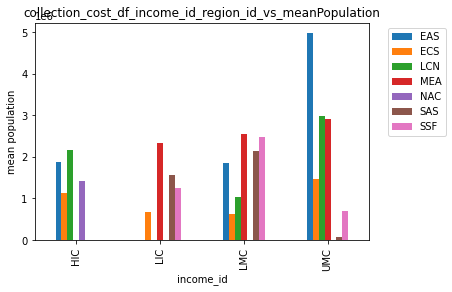

mean msw


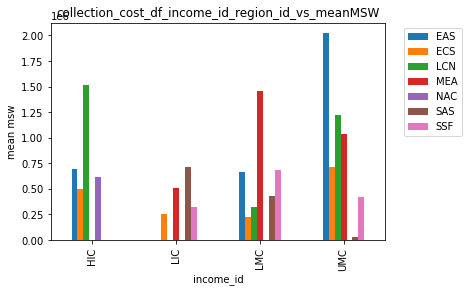

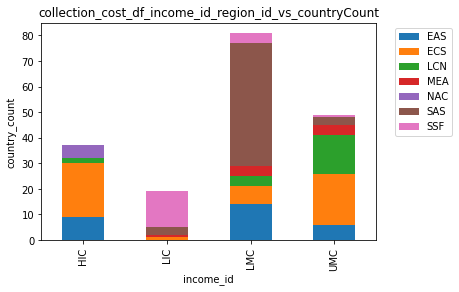

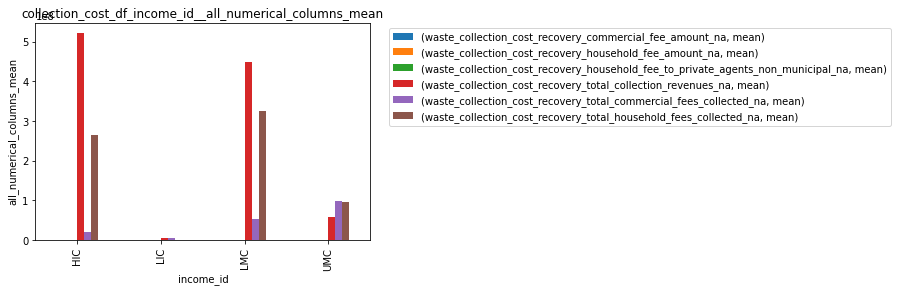

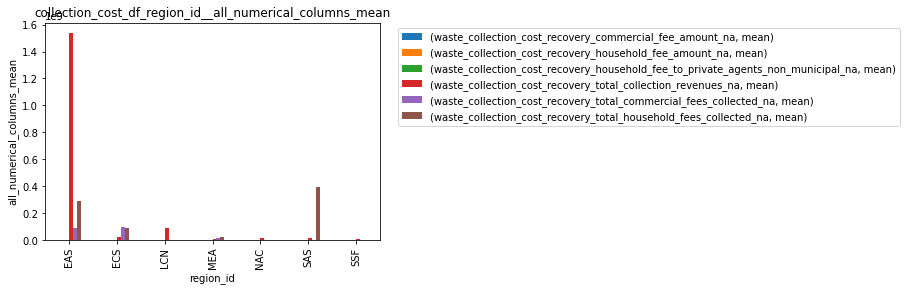


ANALYSIS: We can see the Count and Distribution of countries reporting data about  collection_cost_df 
, their mean waste generated, and mean population that generates the waste based on income level and region. 
Based on that we know tendancies of the consumers about  ['waste_collection_cost_recovery_commercial_fee_amount_na'
 'waste_collection_cost_recovery_household_fee_amount_na'
 'waste_collection_cost_recovery_household_fee_to_private_agents_non_municipal_na'
 'waste_collection_cost_recovery_metadata_commercial_fee_type_na'
 'waste_collection_cost_recovery_metadata_household_fee_type_na'
 'waste_collection_cost_recovery_metadata_main_method_of_household_billing_na'
 'waste_collection_cost_recovery_total_collection_revenues_na'
 'waste_collection_cost_recovery_total_commercial_fees_collected_na'
 'waste_collection_cost_recovery_total_household_fees_collected_na']

INFERENCE:  With the exception of HIC in LCN, LMC in MEA, and UMC in EAS, everywhere countries that report penalizing

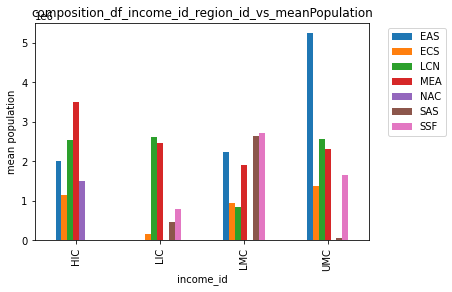

mean msw


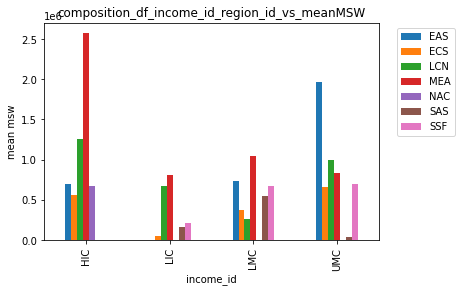

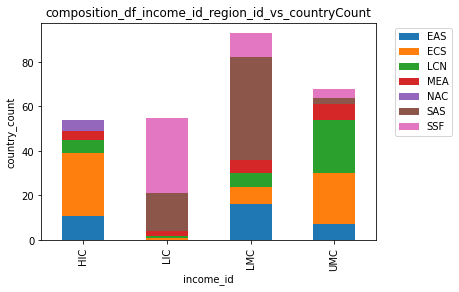

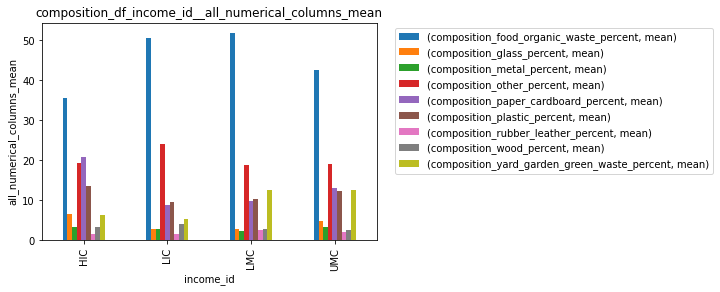

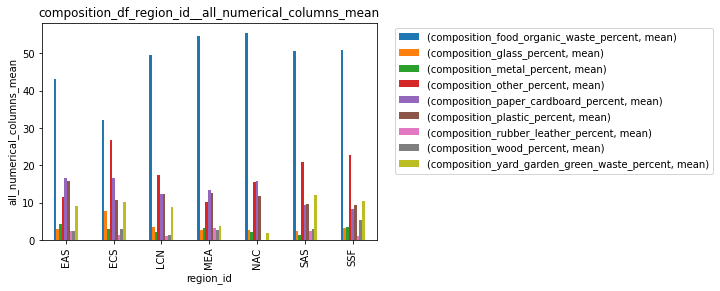


ANALYSIS: We can see the Count and Distribution of countries reporting data about  composition_df 
, their mean waste generated, and mean population that generates the waste based on income level and region. 
Based on that we know tendancies of the consumers about  ['composition_food_organic_waste_percent' 'composition_glass_percent'
 'composition_metal_percent' 'composition_other_percent'
 'composition_paper_cardboard_percent' 'composition_plastic_percent'
 'composition_rubber_leather_percent' 'composition_wood_percent'
 'composition_yard_garden_green_waste_percent']

INFERENCE:  Per capita waste in HIC is more than that in LIC and LMC. Similar study for regions suggests per capita waste production in NAC is very high. \We have seen EAS shows high penalty fee for collection and lowest ‘uncategorized’ waste, we can infer that penalizing doesn’t affect generation but promotes efficient management and separation at the consumer level


 PENALTY EFFECT separation_df 0 2
mean population


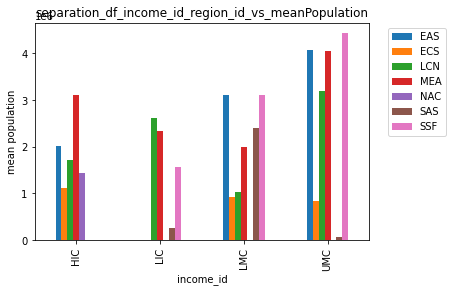

mean msw


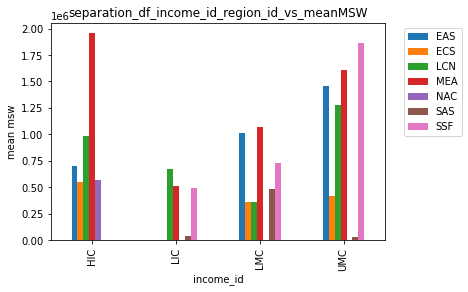

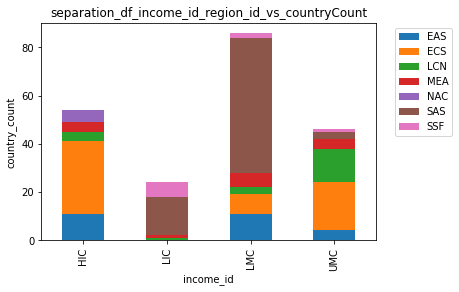


ANALYSIS: We can see the Count and Distribution of countries reporting data about  separation_df 
, their mean waste generated, and mean population that generates the waste based on income level and region. 
Based on that we know tendancies of the consumers about  ['separation_breakdonw_cans_and_metals_na' 'separation_breakdonw_glass_na'
 'separation_breakdonw_organics_na' 'separation_breakdonw_other_na'
 'separation_breakdonw_paper_cardboard_na'
 'separation_breakdonw_plastics_and_packaging_na'
 'separation_existence_of_source_separation_na']

INFERENCE:  Populous cities tend to fail to report separation in HIC and UMC

CONCLUSION:  Countries in Europe imposing heavy penalty report good separation and overall tracking of their waste.Less percentage of waste is unaccounted for. Secondly, Food waste is the largest contributor to overall waste in the world. Not a single country is an exception.


 NON-MONETORY IMPACT transportation_df 1 0
mean population


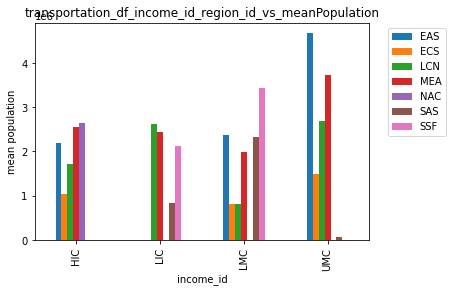

mean msw


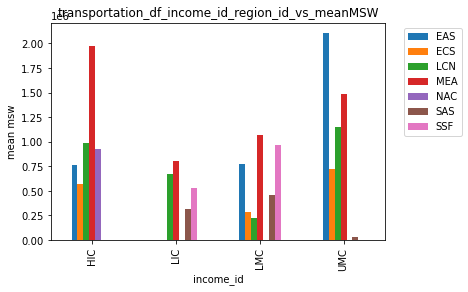

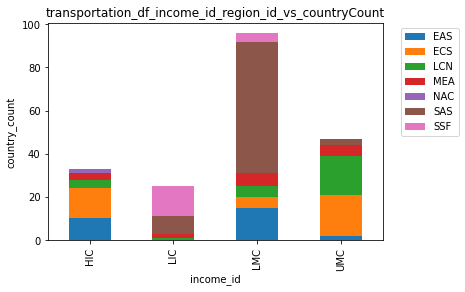

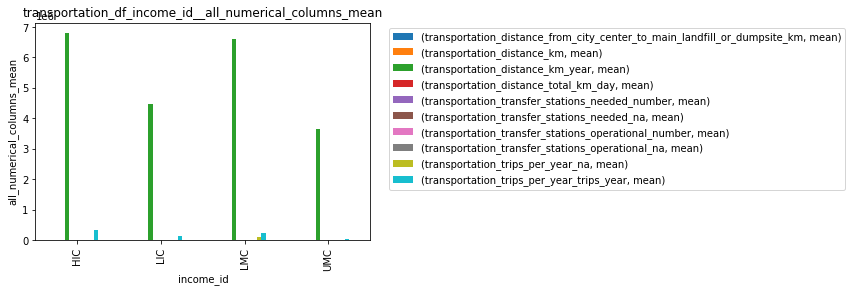

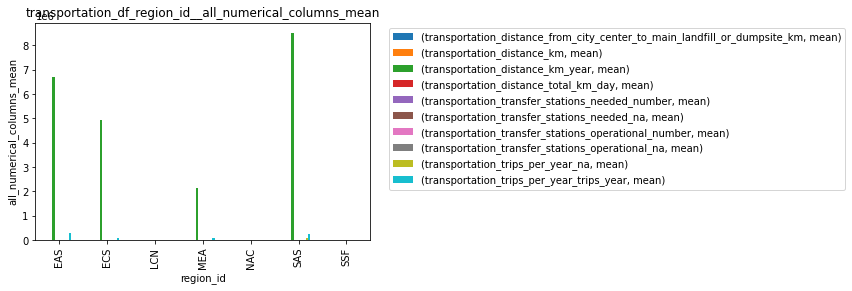

No handles with labels found to put in legend.



ANALYSIS: We can see the Count and Distribution of countries reporting data about  transportation_df 
, their mean waste generated, and mean population that generates the waste based on income level and region. 
Based on that we know tendancies of the consumers about  ['transportation_distance_from_city_center_to_main_landfill_or_dumpsite_km'
 'transportation_distance_km' 'transportation_distance_km_year'
 'transportation_distance_na' 'transportation_distance_total_km_day'
 'transportation_scale_calibration_and_operation_status_na'
 'transportation_scale_usage_na'
 'transportation_transfer_station_or_collection_point_aggregation_na'
 'transportation_transfer_station_or_colletion_point_aggregation_na'
 'transportation_transfer_stations_needed_number'
 'transportation_transfer_stations_needed_na'
 'transportation_transfer_stations_operational_number'
 'transportation_transfer_stations_operational_na'
 'transportation_trips_per_year_na'
 'transportation_trips_per_year_trips_year']

INFER

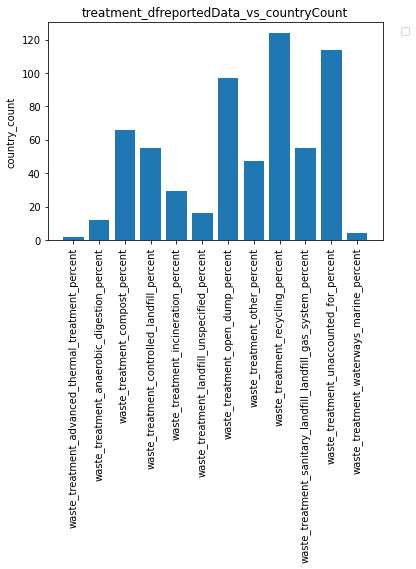

*********END OF REPORTED DATA***********

ANALYSIS: We can see the number of countries reporting data about  treatment_df 
Based on that we know the priorities of the governing bodies and their preferences.

INFERENCE:  Second most reported waste treatment is ‘unaccounted’. It means disposal method of most of the waste is unknown.If we look at top methods of disposal in all income levels, all regions, it is some kind of a landfill.

CONCLUSION:  Populous cities contribute to significant carbon emmisions for transporting waste to outskirts. Landfills are most popular choice of disposal but it too contributes to green house gas emmisions.


 COST & REVENUE management_df 2 0
mean population


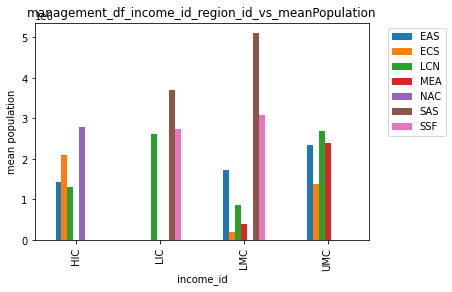

mean msw


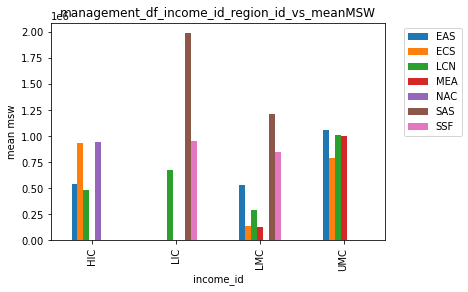

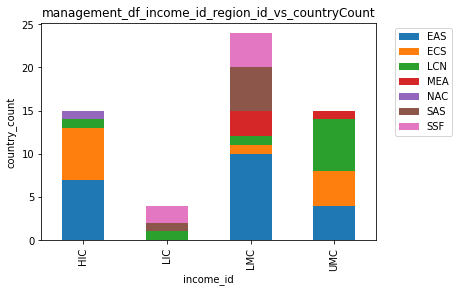

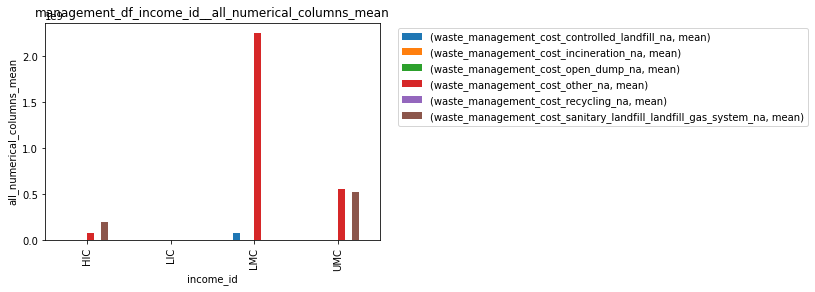

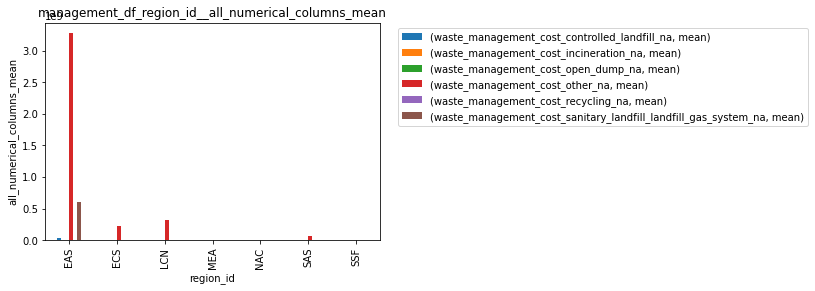


ANALYSIS: We can see the Count and Distribution of countries reporting data about  management_df 
, their mean waste generated, and mean population that generates the waste based on income level and region. 
Based on that we know tendancies of the consumers about  ['waste_management_cost_controlled_landfill_na'
 'waste_management_cost_incineration_na'
 'waste_management_cost_open_dump_na' 'waste_management_cost_other_na'
 'waste_management_cost_recycling_na'
 'waste_management_cost_sanitary_landfill_landfill_gas_system_na']

INFERENCE:  High cost of waste management is reported in LMC and UMC countries of EAS, ECS, and LCN.


 COST & REVENUE energy_df 2 1
mean population


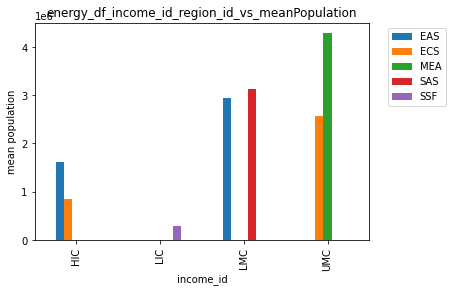

mean msw


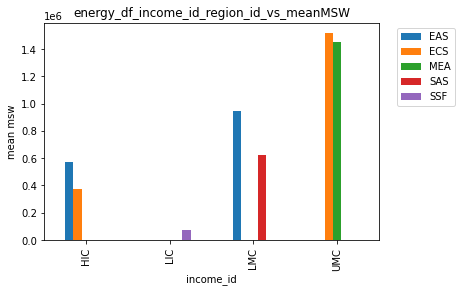

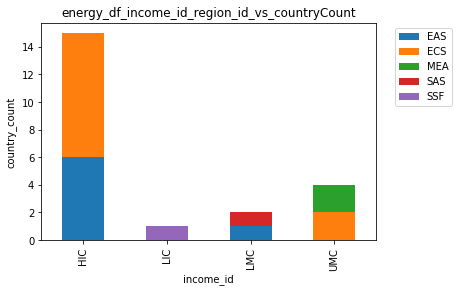

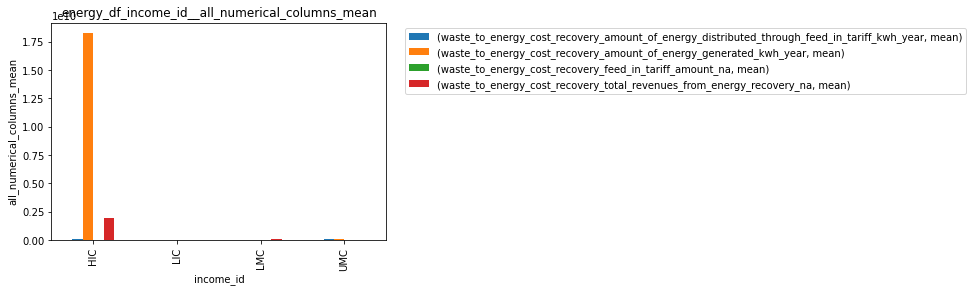

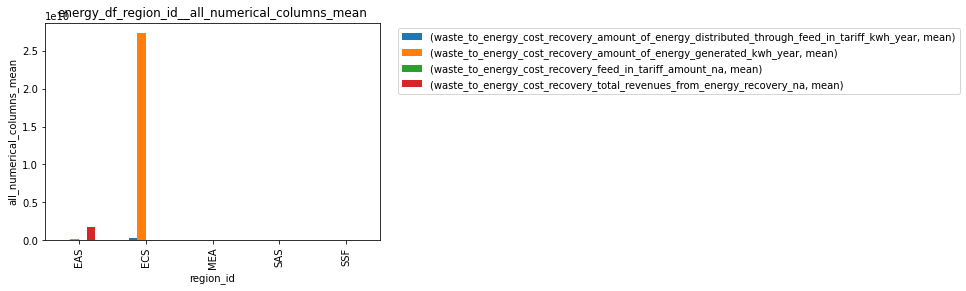


ANALYSIS: We can see the Count and Distribution of countries reporting data about  energy_df 
, their mean waste generated, and mean population that generates the waste based on income level and region. 
Based on that we know tendancies of the consumers about  ['waste_to_energy_cost_recovery_amount_of_energy_distributed_through_feed_in_tariff_kwh_year'
 'waste_to_energy_cost_recovery_amount_of_energy_generated_kwh_year'
 'waste_to_energy_cost_recovery_feed_in_tariff_amount_na'
 'waste_to_energy_cost_recovery_total_revenues_from_energy_recovery_na']

INFERENCE:  High revenue from energy generation is reported in HIC

CONCLUSION:  We have seen penalty ensures tracking waste at consumer level. Hence, these countries also manage to generate revenue by energy, recycling, etc. Although incinerating creates carbon costs. In conclusion, if an innovative product or service focusses on tracking and penalising food waste in populous cities, it can overcome many of above mentioned shortcomings.


In [82]:
levels = ['income_id', 'region_id']#,

target_levels = ['total_msw_total_msw_generated_tons_year', 'population_population_number_of_people']
target_questions = ['PENALTY EFFECT', 'NON-MONETORY IMPACT', 'COST & REVENUE']
analysis_topic_dfList = [[collection_cost_df,# CONSLUSION 1
                         composition_df, # CONSLUSION 1 and 2
                         separation_df],# CONSLUSION 1 
                         #informal_impact_df, 
                         #framework_df,
                         [transportation_df, # CONSLUSION 3 
                         treatment_df], # CONSLUSION 1                         
                         [management_df, 
                         #disposal_df, # CONSLUSION 3                          
                         energy_df] # CONSLUSION 1 and 3 
                        ]

analysis_for_targets = [#Question1
                        [#Collection cost
                        ['stacked_mean', 'individual'], 
                        #Composition
                        ['stacked_mean'], 
                        #Separation
                        ['stacked_mean']],
                        #Question2
                        [#Transportation
                        ['stacked_mean', 'individual'], 
                        # Treatment
                        ['reported', 'stacked_mean']],
                        #Question3
                        [#Management cost
                        ['stacked_mean'],
                        # Energy
                        ['stacked_mean']]]
inference_for_targets = [#Question 1
                          [
                            #Collection cost inferences
                            ['',
                            'With the exception of HIC in LCN, LMC in MEA, and UMC in EAS, everywhere countries that report penalizing the consumers for waste collection, showed uniform per capita msw (i.e., mean msw follows mean population trend).Significant revenue is reported by HIC and LMC countries concentrated in EAS and a few in SAS', 
                            'More specifically — including the waste collection fee in the utility bill translates to lower msw.'
                            ],
                          
                            #Composition inferences
                            ['',
                             'Per capita waste in HIC is more than that in LIC and LMC. Similar study for regions suggests per capita waste production in NAC is very high. \We have seen EAS shows high penalty fee for collection and lowest ‘uncategorized’ waste, we can infer that penalizing doesn’t affect generation but promotes efficient management and separation at the consumer level',
                            ],
                            
                            #Separation inferences
                            ['',
                             'Populous cities tend to fail to report separation in HIC and UMC'
                            ]
                          ],
                         #Question 2 
                          [
                            #Transporation inferences
                            ['',
                             '', 
                             'Increase in transportation distance translates to increase in msw in the scatter plot. MSW also increases with increase in population, requiring more collection points.'
                            ],
                        
                            #Treatement inferences
                            ['Second most reported waste treatment is ‘unaccounted’. It means disposal method of most of the waste is unknown.If we look at top methods of disposal in all income levels, all regions, it is some kind of a landfill.',
                            'For HIC, incineration is the top most preferred method of waste treatment. We know that it causes very high carbon emissions',
                            '']
                         ],
                        #Question 3 
                         [
                            #Management cost inferences
                            ['','High cost of waste management is reported in LMC and UMC countries of EAS, ECS, and LCN.'],
                            #Energy revenue inferences
                            ['','High revenue from energy generation is reported in HIC']
                         ]
                        ]
                         
                         
conclusions = ['Countries in Europe imposing heavy penalty report good separation and overall tracking of their waste.Less percentage of waste is unaccounted for. Secondly, Food waste is the largest contributor to overall waste in the world. Not a single country is an exception.',
               
              'Populous cities contribute to significant carbon emmisions for transporting waste to outskirts. Landfills are most popular choice of disposal but it too contributes to green house gas emmisions.',
               
              'We have seen penalty ensures tracking waste at consumer level. Hence, these countries also manage to generate revenue by energy, recycling, etc. Although incinerating creates carbon costs. In conclusion, if an innovative product or service focusses on tracking and penalising food waste in populous cities, it can overcome many of above mentioned shortcomings.']


'''

analysis_topic_dfList = [#informal_impact_df, 
                         #framework_df,
                         composition_df, # CONSLUSION 1 and 2
                         separation_df, 
                         transportation_df, # CONSLUSION 3 
                         collection_cost_df,# CONSLUSION 1
                         collection_cover_df,
                         management_df, 
                         disposal_df, # CONSLUSION 3
                         treatment_df, # CONSLUSION 1 
                         energy_df # CONSLUSION 1 
                        ]'''

i= 0

for target_question in target_questions:    
    j=0
    for df in analysis_topic_dfList[i]:
        print("\n\n",target_question, df.name, i, j)
        df = rectify_data(df)
        
        if 'reported' in analysis_for_targets[i][j]: 
            get_reportedData_distribution(df)
            print("\nANALYSIS: We can see the number of countries reporting data about ", df.name, 
                  "\nBased on that we know the priorities of the governing bodies and their preferences.")
            print("\nINFERENCE: ", inference_for_targets[i][j][0])
        elif 'stacked_mean' in analysis_for_targets[i][j]: 
            get_stacked_distribution(df, levels, target_levels)            
            print("\nANALYSIS: We can see the Count and Distribution of countries reporting data about ", df.name,
                  "\n, their mean waste generated, and mean population that generates the waste based on income level and region.", 
                  "\nBased on that we know tendancies of the consumers about ",df.columns.values)
            
            print("\nINFERENCE: ",inference_for_targets[i][j][1])
        elif 'individual' in analysis_for_targets[i][j]: 
            get_clusters(df, levels,target_levels[0])
            print("\nANALYSIS: We can see the Count and Distribution of countries reporting data about ", df.name,
                  "\n, thier actual waste generated based on income level and region.",
                  "\nBased on that we know effect (if any) of various methods/choices in governence and management such as ",df.columns.values)
            print("\nINFERENCE: ",inference_for_targets[i][j][2])
        j = j +1
        #check_relation(df)
    print("\nCONCLUSION: ",conclusions[i])
    i=i+1